# **MLP 활용 회귀**  
**┗ 데이터 직군 연봉 예측**
---

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* Session 1 - 「Data 전처리 및 EDA」
* Session 2 - 「가설 수립 및 검증」
* Session 3 - 「MLP 활용 연봉 예측」

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오**

```
A사는 요즘 핫(hot)한 데이터 직군 채용에 힘쓰고 있다. 사업을 확장하면서 발생하는 데이터의 양이 증가했고, 이를 통해 인사이트와 핵심 이슈들을   
선별하는 작업들이 필수적이게 되었다. 이에 데이터 직군을 채용하려고 하는데 어느 정도의 연봉을 들여서 채용을 해야하는지 고민에 빠져 있다.  
지원자의 데이터를 통해 데이터 직군 연봉을 예측하는 모델을 만들고, 협상시 베이스 라인으로 활용하고자 한다.

```  

> **데이터 살펴보기**

* 데이터 직군 연봉 및 추가정보
* 데이터 명세 ⬇
* https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

|Column|Description|
|:---|:---|
|work_year| 급여를 지급한 해|
|experience_level|직무 경험수준 (EN : 주니어 / MI : 중급, SE : 시니어 레벨, 전문가 / EX : 임원급, 이사)|
|employment_type|고용 유형 (PT: 파트타임 / FT : 풀타임 / CT : 계약직 / FL : 프리랜서)|
|job_title|직무|
|salary|총 급여|
|salary_currency|통화 코드|
|salaryinusd|급여(USD)|
|employee_residence|근무 연도 중 거주 국가|
|remote_ratio|원격 근무 비율|
|company_location|회수 위치|
|company_size|당해 연도 평균 근무인원 (S : 50인 미만(소) / M : 50~250인(중) / L : 250인 이상(대))|




In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.read_csv("/content/drive/MyDrive/fastcam/Part 8. 정형 데이터/Chapter 01. MLP 활용 회귀 - 데이터 직군 연봉 예측/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 데이터 직군 직원 채용 시 연봉 산정 어려움
```  

> **기대효과**

```
▶ 채용 시 연봉 산정 베이스 라인 활용으로 원활한 채용 진행
```

> **해결방안**

```
▶ 지원자의 정보를 통해 데이터 직군 연봉 추정(예측)
▶ Session 1
 - Data 전처리 및 EDA
▶ Session 2
 - 가설을 수립하고 데이터를 통해 검증
▶ Session 3
 - MLP 활용 연봉 에측 모델링 수행
```

> **성과측정**  

```
▶ 모델 활용 전/후 채용 프로세스 진행 속도 비교
```

> **현업적용**  

```
▶ 지원자 채용 시 모델 활용 협상 진행
```

## **Session 1**  
**┗ Data 전처리 및 EDA**  
---

### Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [ ]:
print('df :', df.shape)

df : (607, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [ ]:
df = df.drop(['Unnamed: 0', 'salary_currency', 'salary'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_list : ['work_year', 'salary_in_usd', 'remote_ratio']


In [ ]:
list_of_df = []

for var in categorical_list :
  loop_df = pd.DataFrame({'var':[var], 'ncnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_concat = pd.concat(list_of_df).reset_index(drop=True)
df_concat

,var,ncnt
0,experience_level,4
1,employment_type,4
2,job_title,50
3,employee_residence,57
4,company_location,50
5,company_size,3


In [ ]:
df_job = pd.DataFrame(df['job_title'].value_counts())
df_job.head(10)

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


<BarContainer object of 50 artists>

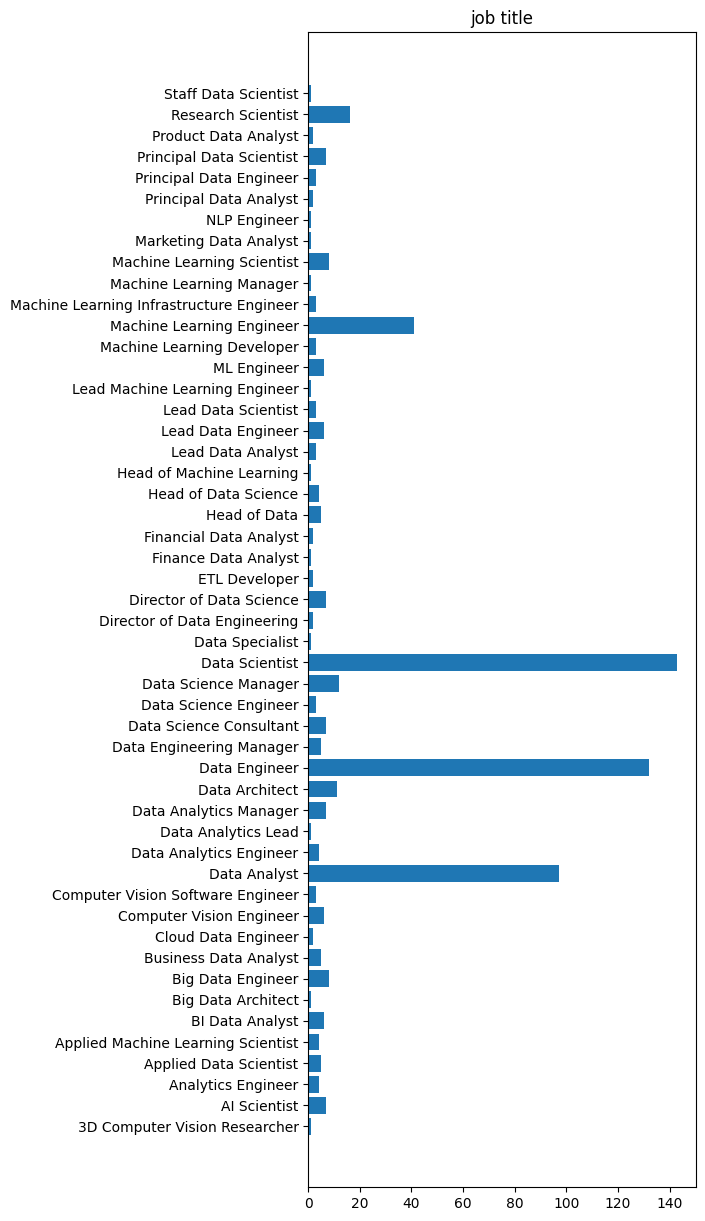

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['default'])

df_job = df_job.sort_values(by=['job_title'])

fig = plt.figure(figsize=(5,15))
plt.title('job title')
plt.barh(df_job.index, df_job['count'])
# plt.xticks(rotation=-90);

## **Session 2**  
**┗ 가설 수립 및 검증**  
---
* 문제해결 프로세스(Problem Solving Process)에서 가장 핵심적인 부분
* 가설은 문제해결을 위한 '핵심 아이디어'
* 현재 우리가 보유하고 있는 데이터로 문제를 해결할 수 있는지 사전 검증하는 작업

###  연도가 증가할 수록 연봉이 상승할 것이다.
---

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
df_work_year = pd.DataFrame(df.groupby('work_year')['salary_in_usd'].mean()).reset_index()
df_work_year

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


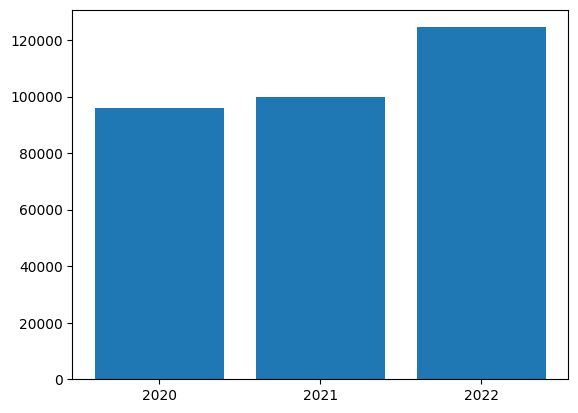

In [ ]:
plt.bar(df_work_year['work_year'].astype(str), df_work_year['salary_in_usd']);

In [ ]:
df['job_title'].head()

,job_title
0,Data Scientist
1,Machine Learning Scientist
2,Big Data Engineer
3,Product Data Analyst
4,Machine Learning Engineer


In [ ]:
top3 = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_top3 = pd.DataFrame(df[df['job_title'].isin(top3)].groupby(['work_year', 'job_title'])['salary_in_usd'].mean())
df_top3.reset_index(inplace=True)
df_top3

,work_year,job_title,salary_in_usd
0,2020,Data Analyst,45547.285714
1,2020,Data Engineer,88162.000000
2,2020,Data Scientist,85970.523810
3,2021,Data Analyst,79505.411765
4,2021,Data Engineer,83202.531250
5,2021,Data Scientist,70671.733333
6,2022,Data Analyst,100550.739726
7,2022,Data Engineer,126375.696629
8,2022,Data Scientist,136172.090909


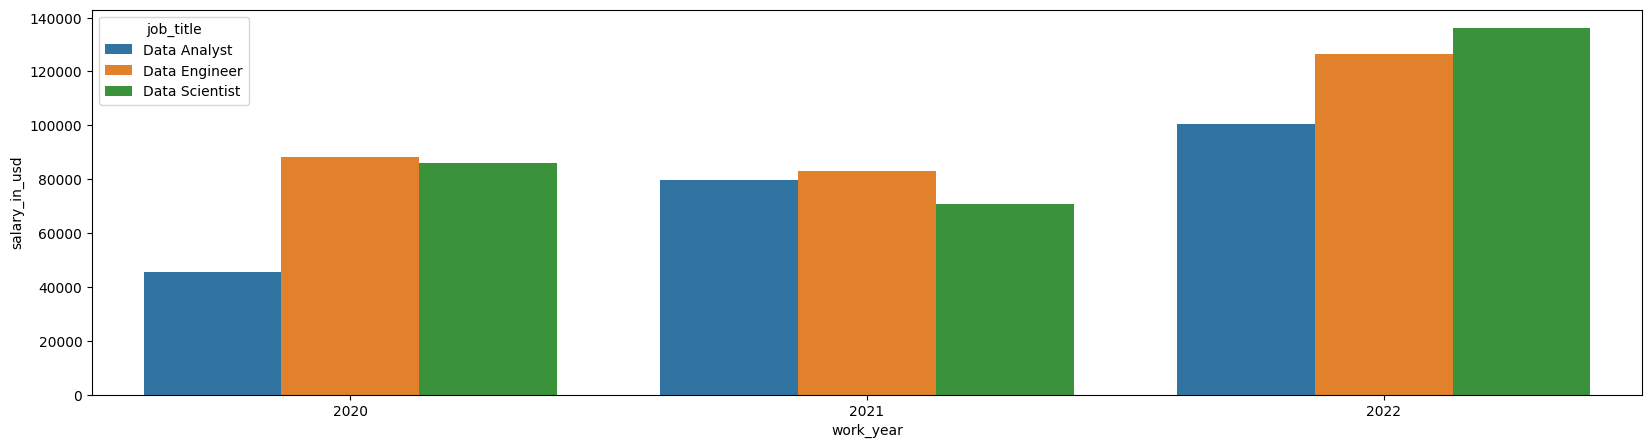

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top3['work_year'].astype(str), y=df_top3['salary_in_usd'], hue='job_title', data=df_top3);

# DS의 연봉이 크게 올라가는중

In [ ]:
import pandas as pd

df_top3_ratio = pd.pivot_table(df_top3, index=['job_title'], columns=['work_year'], values=['salary_in_usd']).reset_index()
df_top3_ratio

job_title salary_in_usd                             
work_year                          2020          2021           2022
0            Data Analyst  45547.285714  79505.411765  100550.739726
1           Data Engineer  88162.000000  83202.531250  126375.696629
2          Data Scientist  85970.523810  70671.733333  136172.090909

In [ ]:
df_top3_ratio.columns = ['job_title', '2020_s', '2021_s', '2022_s']
df_top3_ratio

,job_title,2020_s,2021_s,2022_s
0,Data Analyst,45547.285714,79505.411765,100550.739726
1,Data Engineer,88162.000000,83202.531250,126375.696629
2,Data Scientist,85970.523810,70671.733333,136172.090909


In [ ]:
df_top3_ratio['s_i_rate_1st'] = round((df_top3_ratio['2021_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio['s_i_rate_2nd'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2021_s']) / df_top3_ratio['2021_s']* 100,2)
df_top3_ratio['s_i_rate_total'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio

,job_title,2020_s,2021_s,2022_s,s_i_rate_1st,s_i_rate_2nd,s_i_rate_total
0,Data Analyst,45547.285714,79505.411765,100550.739726,74.56,26.47,120.76
1,Data Engineer,88162.000000,83202.531250,126375.696629,-5.63,51.89,43.34
2,Data Scientist,85970.523810,70671.733333,136172.090909,-17.80,92.68,58.39


### 근무 지역은 연봉에 큰 영향이 없을 것이다.
---

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
df['employee_residence'].value_counts().head(10)

,count
employee_residence,
US,332
GB,44
IN,30
CA,29
DE,25
FR,18
ES,15
GR,13
JP,7


In [ ]:
top_10_residence = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT']

df_top_10_res = pd.DataFrame(df[df['employee_residence'].isin(top_10_residence)].groupby('employee_residence')['salary_in_usd'].mean()).reset_index()
df_top_10_res

,employee_residence,salary_in_usd
0,CA,97085.310345
1,DE,85552.560000
2,ES,57593.400000
3,FR,59886.611111
4,GB,81403.159091
5,GR,56331.230769
6,IN,37322.333333
7,JP,103537.714286
8,PT,42862.500000
9,US,149194.117470


<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

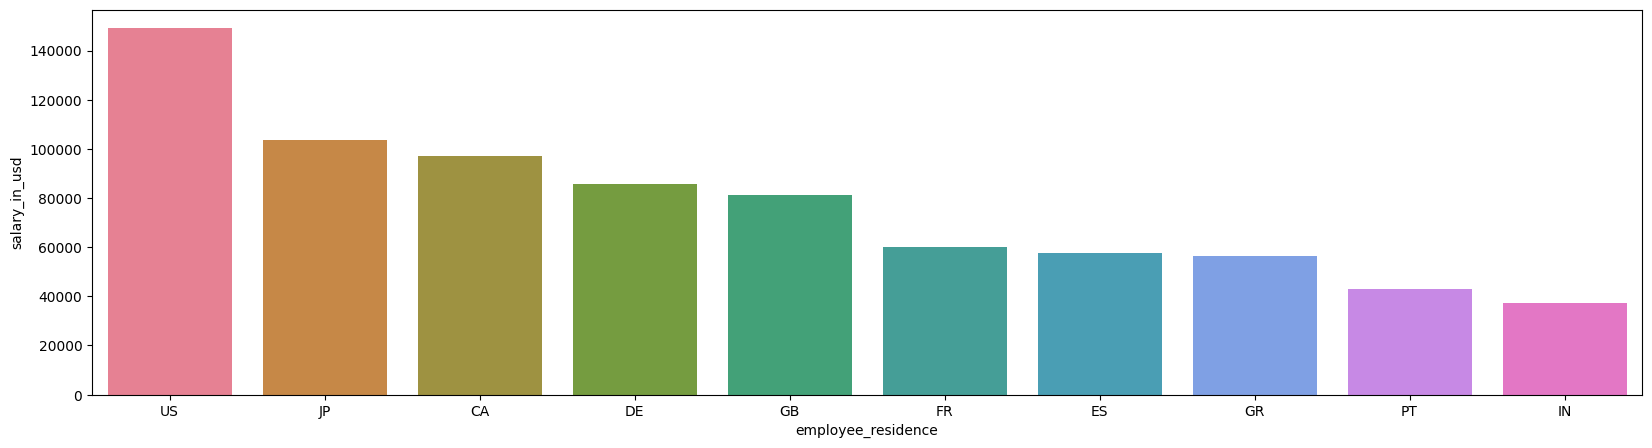

In [ ]:
colors = sns.color_palette("husl", len(df_top_10_res))


plt.figure(figsize=(20, 5))
sns.barplot(x=df_top_10_res['employee_residence'].astype(str),
            y=df_top_10_res['salary_in_usd'],
            data=df_top_10_res,
            palette=colors)

# 미국의 평균 급여가 가장 높음

## **Session 3**  
**┗ MLP 활용 연봉 예측**  
---

### 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  onehot = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray(),
                        columns = encoder.get_feature_names_out())

  df = pd.concat([df,onehot], axis = 1).drop(columns = [col])

In [ ]:
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,...,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X=df.drop(['work_year', 'salary_in_usd'], axis=1)
Y=df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=810)

In [ ]:
scaler = preprocessing.MinMaxScaler()

x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.transform(x_test.values)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Tensor 변환
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [ ]:
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(y_train.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(y_test.values.ravel()).float()

print("[Train set Tensors] \n")
print(x_tensor)
print(y_tensor)
print("\n[Test set Tensors] \n")
print(xtest_tensor)
print(ytest_tensor)

[Train set Tensors] 

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
tensor([ 98158., 175100.,  50000.,  82500.,  91614., 130000., 158200.,  54957.,
        135000.,  36643., 152000., 188000.,   9466., 276000., 106260.,  79197.,
         43966.,  59303.,  65438., 100000.,  24000.,  93427.,  52351.,  76940.,
        110000., 102100.,  85000., 144854., 135000.,  60000.,  38400., 120000.,
        130000., 160000.,  10000., 412000., 150000.,  43966., 185100.,  60757.,
        101570., 104890., 112300., 112900.,  18442., 210000., 113000., 147000.,
        165220.,  99000.,  67000., 170000., 117789., 200000.,  80000., 167000.,
         33511.,  50000.,  77684., 130000., 165000., 100800.,  69741., 104702.,
         40481.,  69336., 153000., 109280.,  49461.,  76833., 211500., 210000.,
    

In [ ]:
bs = 10

y_tensor = y_tensor.unsqueeze(1) # 평탄화 tensor에 1차원을 추가, 차원이 없는 Tensor에 1차원이 추가됨
train_ds = TensorDataset(x_tensor, y_tensor)
train_dl = DataLoader(train_ds, batch_size=bs)

ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=bs)

In [ ]:
x_tensor.shape, y_tensor.shape

(torch.Size([485, 169]), torch.Size([485, 1]))

### NN(Neural Network, 신경망) 설계
---
* 딥러닝 모델 학습을 위한 신경망 설계
* MLP(Multi Layer Perceptron) 구성

In [ ]:
n_input_dim = x_train.shape[1]

class Regressor(nn.Module):
    def __init__(self):
        super(Regressor,self).__init__()
        self.fc1 = nn.Linear(n_input_dim, 300, bias=True) # 첫 번째 레이어
        self.fc2 = nn.Linear(300, 100, bias=True) # 두 번째 레이어
        self.fc3 = nn.Linear(100, 1, bias=True) # 출력 레이어
        self.relu = nn.ReLU() # 활성화 함수 ( 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환함.)
        self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다

    def forward(self, x):
        x = self.relu(self.fc1(x)) # 활성화 함수 적용
        x = self.dropout(self.relu(self.fc2(x))) # 은닉층에서 전달할 때, 50% 를 dropout(Connection을 무작위 drop, overfitting 방지)
        x = self.relu(self.fc3(x))
        return x

model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=169, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
model = Regressor()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
#weight decay : L2 정규화에서 패널티 계수를 의미함. 클수록 제약조건 강함, 람다(λ)
epochs = 100

### 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [ ]:
model.train()
train_loss = []
# n = len(train_dl)

for epoch in range(epochs):
    running_loss =0.0
    for data in train_dl:
        inputs, values = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, values)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss/len(train_dl) # ▶ 1-epoch 내에 모든 iteration의 Loss의 평균값을 구함
    print("Loss in epoch :"+str(epoch)+" is: "+str(epoch_loss))
    train_loss.append(epoch_loss)
print('Last iteration loss value: '+ str(loss.item()))

Loss in epoch :0 is: 18027990559.34694
Loss in epoch :1 is: 18003230155.7551
Loss in epoch :2 is: 17878968069.22449
Loss in epoch :3 is: 17549554708.89796
Loss in epoch :4 is: 16918663345.632652
Loss in epoch :5 is: 15975425494.204082
Loss in epoch :6 is: 14534614151.836735
Loss in epoch :7 is: 12920769504.65306
Loss in epoch :8 is: 11097761598.693878
Loss in epoch :9 is: 9280966452.244898
Loss in epoch :10 is: 7500534360.816326
Loss in epoch :11 is: 6434614384.32653
Loss in epoch :12 is: 5484588089.469388
Loss in epoch :13 is: 5032823349.551021
Loss in epoch :14 is: 4868166504.489796
Loss in epoch :15 is: 4572063855.020409
Loss in epoch :16 is: 4439033600.0
Loss in epoch :17 is: 4437220570.122449
Loss in epoch :18 is: 4338283979.755102
Loss in epoch :19 is: 4205050287.020408
Loss in epoch :20 is: 4119116354.612245
Loss in epoch :21 is: 3927973641.7959185
Loss in epoch :22 is: 3905698352.3265305
Loss in epoch :23 is: 3913461287.1836734
Loss in epoch :24 is: 4016367111.836735
Loss in ep

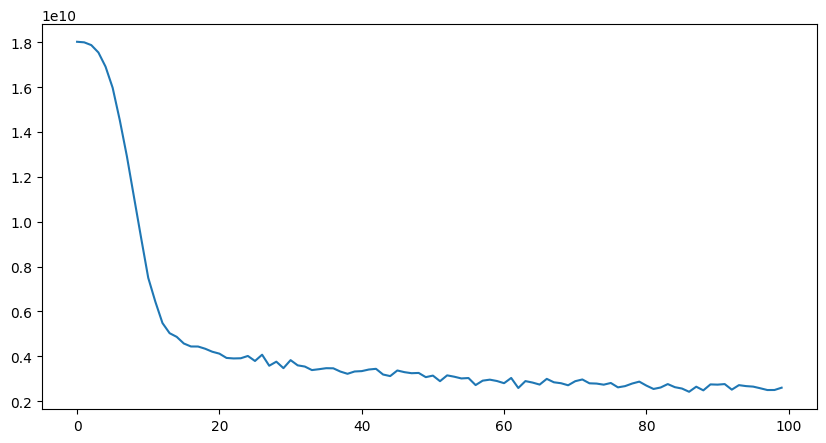

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['default'])

plt.plot(train_loss)
plt.gcf().set_size_inches(10 ,5)
plt.show();

In [ ]:
predictions = torch.tensor([], dtype=torch.float) # 예측값 저장을 위한 빈 텐서
actual = torch.tensor([], dtype=torch.float) # 실제값 저장을 위한 빈 텐서


with torch.no_grad(): # requires_grad 비활성화
    model.eval() # dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

    # 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
    for data in test_loader:
        inputs, values = data
        outputs = model(inputs)

        # torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
        predictions = torch.cat((predictions, outputs), 0)
        actual = torch.cat((actual, values), 0)

predictions = predictions.numpy()
actual = actual.numpy()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(list(predictions.squeeze()), list(actual.squeeze())))

np.float64(57416.70087795019)

In [ ]:
df['salary_in_usd'].describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # 예측값 저장을 위한 빈 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값 저장을 위한 빈 텐서
    with torch.no_grad(): # requires_grad 비활성화
        model.eval() # dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

        # 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            # torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
            predictions = torch.cat((predictions, outputs), 0)
            actual = torch.cat((actual, values), 0)

    predictions = predictions.numpy()
    predictions = list(predictions.squeeze())

    actual = actual.numpy()
    actual = list(actual.squeeze())

    rmse = np.sqrt(mean_squared_error(predictions, actual))
    r2 = r2_score(actual, predictions)

    return rmse, r2


train_rmse, train_r2 = evaluation(train_dl)
test_rmse, test_r2 = evaluation(test_loader)

print('학습용 셋(rmse) :', train_rmse, '/ 학습용 셋(r2) :', train_r2)
print('테스트 셋(rmse) :', test_rmse, '/ 테스트 셋(r2) :', test_r2)

학습용 셋(rmse) : 44176.41554797917 / 학습용 셋(r2) : 0.6037379964277215
테스트 셋(rmse) : 57416.70087795019 / 테스트 셋(r2) : 0.39191999932718447
